# 淘米洗菜——数据预处理

## 缺失值处理

### 缺失值查看

In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_excel(r'test.xlsx',sheet_name=0)
df 

,编号,年龄,性别,注册时间
0,A1,54.0,男,2018-08-08
1,A2,16.0,NaN,2018-08-09
2,A3,47.0,女,2018-08-10
3,NaN,NaN,NaN,NaT
4,A4,41.0,男,2018-08-11
5,A5,37.0,男,2018-08-12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
编号      5 non-null object
年龄      5 non-null int64
性别      4 non-null object
注册时间    5 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 240.0+ bytes


In [7]:
df.isnull()

,编号,年龄,性别,注册时间
0,False,False,False,False
1,False,False,True,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


### 缺失值删除
`dropna(）`方法，默认删除含有缺失值的行，只要有一个格是空的就整行删掉

In [12]:
df.dropna()

,编号,年龄,性别,注册时间
0,A1,54.0,男,2018-08-08
2,A3,47.0,女,2018-08-10
4,A4,41.0,男,2018-08-11
5,A5,37.0,男,2018-08-12


`dropna(how='all')`,传入一个how参数，可以只删除那些全为空值的行

In [3]:
df.dropna(how='all')

,编号,年龄,性别,注册时间
0,A1,54.0,男,2018-08-08
1,A2,16.0,NaN,2018-08-09
2,A3,47.0,女,2018-08-10
4,A4,41.0,男,2018-08-11
5,A5,37.0,男,2018-08-12


### 缺失值填充

In [3]:
df.fillna({'性别':'男','年龄':'30'})

,编号,年龄,性别,注册时间
0,A1,54,男,2018-08-08
1,A2,16,男,2018-08-09
2,A3,47,女,2018-08-10
3,NaN,30,男,NaT
4,A4,41,男,2018-08-11
5,A5,37,男,2018-08-12


## 重复值处理

In [4]:
import pandas as pd 
import numpy as np 
df = pd.read_excel(r'test.xlsx',sheet_name='工作表3')
df 

,订单编号,客户姓名,唯一识别码,成交时间
0,A1,张瞳,101,2018-08-08
1,A2,李谷,102,2018-08-09
2,A3,孙凤,103,2018-08-10
3,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


### `drop_duplicates()`对每一行中的所有列值进行判断，如果有两行或者多行所有列值都重复，默认保留第一行

In [5]:
df.drop_duplicates()

,订单编号,客户姓名,唯一识别码,成交时间
0,A1,张瞳,101,2018-08-08
1,A2,李谷,102,2018-08-09
2,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


### 针对某一列或者某几列进行重复值判断并删除

In [7]:
df.drop_duplicates(subset = ['客户姓名','唯一识别码'])

,订单编号,客户姓名,唯一识别码,成交时间
0,A1,张瞳,101,2018-08-08
1,A2,李谷,102,2018-08-09
2,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12


### 保留最后一个重复值

In [8]:
df.drop_duplicates(subset = ['客户姓名','唯一识别码'],keep='last')

,订单编号,客户姓名,唯一识别码,成交时间
0,A1,张瞳,101,2018-08-08
1,A2,李谷,102,2018-08-09
3,A3,孙凤,103,2018-08-10
5,A5,赵恒,104,2018-08-13


### 不保留任何重复值，有重复出现的全部删除

In [9]:
df.drop_duplicates(subset = ['客户姓名','唯一识别码'],keep=False)

,订单编号,客户姓名,唯一识别码,成交时间
0,A1,张瞳,101,2018-08-08
1,A2,李谷,102,2018-08-09


## 数据类型转换

### Pandas 主要数据类型
- `int64` 整数
- `object` 文本
- `float64` 浮点数
- `bool` 布尔值
- `datetime64[ns]` 日期时间

### 查看数据类型

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
订单编号     6 non-null object
客户姓名     6 non-null object
唯一识别码    6 non-null int64
成交时间     6 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 272.0+ bytes


In [17]:
df.dtypes

订单编号             object
客户姓名             object
唯一识别码             int64
成交时间     datetime64[ns]
dtype: object

In [12]:
df['订单编号'].dtype

dtype('O')

### 类型转换

In [15]:
df['唯一识别码'].dtype

dtype('int64')

In [16]:
df['唯一识别码'].astype('float64')

0    101.0
1    102.0
2    103.0
3    103.0
4    104.0
5    104.0
Name: 唯一识别码, dtype: float64

## Pandas 数据类型概览-网络文章学习

In [66]:
import numpy as np
import pandas as pd

df = pd.read_csv("sales_data_types.csv")
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
Customer Number    5 non-null float64
Customer Name      5 non-null object
2016               5 non-null object
2017               5 non-null object
Percent Growth     5 non-null object
Jan Units          5 non-null object
Month              5 non-null int64
Day                5 non-null int64
Year               5 non-null int64
Active             5 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 480.0+ bytes


两个object类型的值直接相加，Python会把它们拼接起来

In [20]:
df['2016']+df['2017']

0      $125,000.00 $162,500.00 
1    $920,000.00 $1,012,000.00 
2        $50,000.00 $62,500.00 
3      $350,000.00 $490,000.00 
4        $15,000.00 $12,750.00 
dtype: object

### 在 Pandas 中转换数据类型的三种方法：
- **使用 `astype()` 来强制转换到合适的 dtype**
- **创建一个自定义函数来转换数据**
- **使用 Pandas 的函数，例如 `to_numeric()` 或 `to_datetime()`**

### 使用 `astype()` 来强制转换

In [34]:
df['Customer Number'].astype('int')

0     10002
1    552278
2     23477
3     24900
4    651029
Name: Customer Number, dtype: int64

要真正修改原始 dataframe 中的客户编号（Customer Number），记得把 astype() 函数的返回值重新赋值给 dataframe，因为 astype() 仅返回数据的副本而不原地修改。

In [37]:
df['Customer Number']=df['Customer Number'].astype('int')
df.dtypes

Customer Number     int64
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

In [38]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


尝试用`astype()`将 2016、Jan Units 这两列转换为int：ValueError: invalid literal for int() with base 10: 'Closed'

In [ ]:
df['2016'].astype('int')

In [ ]:
df['Jan Units'].astype('int')

在这两个例子中，数据都包含不能被解释为数字的值。在销售额（2016）列中，数据包括货币符号以及每个值中的逗号。在 Jan Units 列中，最后一个值是 "Closed"，它不是一个数字；所以我们得到了异常。

In [41]:
df['Active'].astype('bool')

0    True
1    True
2    True
3    True
4    True
Name: Active, dtype: bool

在 Active 列中再试一次，所有的值都被解释为 True，但最后一个客户有一个 N 的活动（Active）标志，所以这并不正确。

**重点**是 `astype()` 只有在下列情况下才能工作：
- **数据是干净的，可以简单地解释为一个数字**
- **你想要将一个数值转换为一个字符串对象**

如果数据具有非数字字符或它们间不同质（homogeneous，我的理解是同一列内有不同类型的数据），那么 astype() 并不是类型转换的好选择。你需要进行额外的变换才能完成正确的类型转换。

### 自定义转换函数

In [16]:
df = pd.read_csv("sales_data_types.csv")
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


对这个数据集，自定义一个货币转换函数

In [8]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """

    new_val = val.replace(',', '').replace('$', '')
    return float(new_val)


df['2016'].apply(convert_currency)
df['2017'].apply(convert_currency)

0     162500.0
1    1012000.0
2      62500.0
3     490000.0
4      12750.0
Name: 2017, dtype: float64

对df列赋值之后，数据类型才会真正完成转换

In [9]:
df['2016'] = df['2016'].apply(convert_currency)
df['2017'] = df['2017'].apply(convert_currency)

df.dtypes

Customer Number    float64
Customer Name       object
2016               float64
2017               float64
Percent Growth      object
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

自定义函数处理`Percent Growth`列中的`%`符号

In [12]:
def convert_percent(val):
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """

    new_val = val.replace('%','')
    return float(new_val)/100

In [13]:
df['Percent Growth'].apply(convert_percent)

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

In [ ]:
df['Percent Growth']=df['Percent Growth'].apply(convert_percent)

In [19]:
df.dtypes

Customer Number    float64
Customer Name       object
2016                object
2017                object
Percent Growth     float64
Jan Units           object
Month                int64
Day                  int64
Year                 int64
Active              object
dtype: object

自定义函数将`Active`列转换为布尔值  
使用np.where() 函数，是numpy中的条件函数，类似excel中的if函数

In [20]:
df['Active']=np.where(df['Active'] == 'Y',True,False)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00","$162,500.00",0.30,500,1,10,2015,True
1,552278.0,Smith Plumbing,"$920,000.00","$1,012,000.00",0.10,700,6,15,2014,True
2,23477.0,ACME Industrial,"$50,000.00","$62,500.00",0.25,125,3,29,2016,True
3,24900.0,Brekke LTD,"$350,000.00","$490,000.00",0.04,75,10,27,2015,True
4,651029.0,Harbor Co,"$15,000.00","$12,750.00",-0.15,Closed,2,2,2014,False


### Pandas 辅助函数

#### 用`to_numeric()`函数处理`Jan Units`列  
`errors='coerce'`这个参数设置后，将不符合转换条件的值强制转换为NaN，还可设置成忽略保留和抛出异常，看文档

In [22]:
pd.to_numeric(df['Jan Units'],errors='coerce')

0    500.0
1    700.0
2    125.0
3     75.0
4      NaN
Name: Jan Units, dtype: float64

同时用0来填充:

In [70]:
pd.to_numeric(df['Jan Units'],errors='coerce').fillna(0)

0    500.0
1    700.0
2    125.0
3     75.0
4      0.0
Name: Jan Units, dtype: float64

#### 用`to_datetime()`函数处理日期时间

In [25]:
pd.to_datetime(df[['Month', 'Day', 'Year']])

0   2015-01-10
1   2014-06-15
2   2016-03-29
3   2015-10-27
4   2014-02-02
dtype: datetime64[ns]

#### **赋值之后就完成全部清洗了，Dataframe 准备好了，可以用于分析**

In [71]:
df['start_date'] = pd.to_datetime(df[['Month', 'Day', 'Year']])  # 原Dataframe新增一列
df['Jan Units'] = pd.to_numeric(df['Jan Units'],errors='coerce').fillna(0)
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,start_date
0,10002.0,Quest Industries,"$125,000.00","$162,500.00",30.00%,500.0,1,10,2015,Y,2015-01-10
1,552278.0,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700.0,6,15,2014,Y,2014-06-15
2,23477.0,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125.0,3,29,2016,Y,2016-03-29
3,24900.0,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75.0,10,27,2015,Y,2015-10-27
4,651029.0,Harbor Co,"$15,000.00","$12,750.00",-15.00%,0.0,2,2,2014,N,2014-02-02


借助 `DataFrame.hist`，您可以快速了解一个列中值的分布：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d4fa90>]],
      dtype=object)

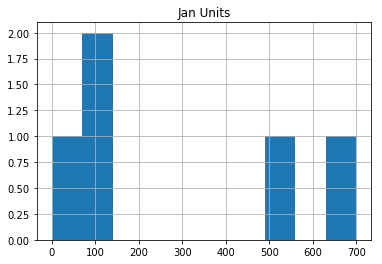

In [77]:
df.hist('Jan Units')

## 索引设置

In [37]:
import pandas as pd 
import numpy as np 
df = pd.read_excel(r'test.xlsx',sheet_name='工作表4')
df

,A1,张瞳,101,2018-08-08 00:00:00
0,A2,李谷,102,2018-08-09
1,A3,孙凤,103,2018-08-10
2,A3,孙凤,103,2018-08-10
3,A4,赵恒,104,2018-08-12
4,A5,赵恒,104,2018-08-13


### 通过`df.columns`参数添加列索引

In [38]:
df.columns = ['订单编号','客户姓名','唯一识别码','成交时间']
df

,订单编号,客户姓名,唯一识别码,成交时间
0,A2,李谷,102,2018-08-09
1,A3,孙凤,103,2018-08-10
2,A3,孙凤,103,2018-08-10
3,A4,赵恒,104,2018-08-12
4,A5,赵恒,104,2018-08-13


### 通过`df.index`参数添加行索引

In [39]:
df.index = [1,2,3,4,5]
df

,订单编号,客户姓名,唯一识别码,成交时间
1,A2,李谷,102,2018-08-09
2,A3,孙凤,103,2018-08-10
3,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


### 用`set_index()`方法重新设置索引

In [24]:
df.set_index('订单编号')

,客户姓名,唯一识别码,成交时间
订单编号,,,
A2,李谷,102,2018-08-09
A3,孙凤,103,2018-08-10
A3,孙凤,103,2018-08-10
A4,赵恒,104,2018-08-12
A5,赵恒,104,2018-08-13


### 设置多个索引，即`层次化索引`

In [41]:
df.set_index(['订单编号','客户姓名'])  ##注意看函数说明，参数需要传入一个标签或标签列表

唯一识别码       成交时间
订单编号 客户姓名                  
A2   李谷      102 2018-08-09
A3   孙凤      103 2018-08-10
     孙凤      103 2018-08-10
A4   赵恒      104 2018-08-12
A5   赵恒      104 2018-08-13

### `df.rename()`方法重命名索引，即修改行或列名称

#### 重命名列索引

In [27]:
df.rename(columns = {'订单编号':'新订单编号','客户姓名':'新客户姓名'})

,新订单编号,新客户姓名,唯一识别码,成交时间
1,A2,李谷,102,2018-08-09
2,A3,孙凤,103,2018-08-10
3,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


#### 重命名行索引

In [29]:
df.rename(index = {1:'一',2:'二',3:'三'})

,订单编号,客户姓名,唯一识别码,成交时间
一,A2,李谷,102,2018-08-09
二,A3,孙凤,103,2018-08-10
三,A3,孙凤,103,2018-08-10
4,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


#### 同时命名列索引和行索引

In [31]:
df.rename(columns = {'订单编号':'新订单编号','客户姓名':'新客户姓名'},
         index = {1:'一',2:'二',3:'三',4:'四'})

,新订单编号,新客户姓名,唯一识别码,成交时间
一,A2,李谷,102,2018-08-09
二,A3,孙凤,103,2018-08-10
三,A3,孙凤,103,2018-08-10
四,A4,赵恒,104,2018-08-12
5,A5,赵恒,104,2018-08-13


### 重置索引`reset_index()`

#### 先建一个有层次化索引的DataFrame

In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_excel(r'test.xlsx',sheet_name='工作表5')
df

,Z1,Z2,C1,C2
0,A,a,1,2
1,A,b,3,4
2,B,a,5,6
3,B,b,7,8


In [2]:
df = df.set_index(['Z1','Z2'])
df

C1  C2
Z1 Z2        
A  a    1   2
   b    3   4
B  a    5   6
   b    7   8

#### 用`reset_index()`方法重置索引

无参数，默认将全部索引转换为columns

In [3]:
df.reset_index()

,Z1,Z2,C1,C2
0,A,a,1,2
1,A,b,3,4
2,B,a,5,6
3,B,b,7,8


将第0级索引转换为columns

In [61]:
df.reset_index(level = 0)

,Z1,C1,C2
Z2,,,
a,A,1,2
b,A,3,4
a,B,5,6
b,B,7,8


将原索引删除，不加入columns

In [63]:
df.reset_index(drop = True)

,C1,C2
0,1,2
1,3,4
2,5,6
3,7,8
